In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from math import sqrt
import seaborn as sns
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# read the data
df=pd.read_csv('song_data.csv')
df_info=pd.read_csv('song_info.csv')
#remove the duplicates
df = df.drop_duplicates(subset=['song_name'])


In [3]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [4]:
df.tail()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
18827,Stay Awake,55,114582,0.898,0.370,0.136,0.000263,7,0.0999,-13.528,1,0.0433,146.081,4,0.0592
18830,Let It Breathe,60,159645,0.893,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.3000
18832,Sudden Love (Acoustic),23,182211,0.847,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.2860
18833,Gentle on My Mind,55,352280,0.945,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.3230
18834,Up to Me,60,193533,0.911,0.640,0.381,0.000254,4,0.1040,-11.790,1,0.0302,91.490,4,0.5810


In [5]:
df_info.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [6]:
# Join the categorical variables
names=df_info['artist_name']
playlist = df_info['playlist']
album = df_info['album_names']
df = df.join(names)
df = df.join(playlist)
df = df.join(album)

In [7]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,playlist,album_names
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,Green Day,00s Rock Anthems,Greatest Hits: God's Favorite Band
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,Linkin Park,00s Rock Anthems,Hybrid Theory
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,The White Stripes,00s Rock Anthems,Elephant
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,Red Hot Chili Peppers,00s Rock Anthems,By The Way (Deluxe Version)
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,Nickelback,00s Rock Anthems,Silver Side Up


In [8]:
#delete records with popularity equal to zero
index_delete = df.index[df['song_popularity']==0]
df = df.drop(index_delete)

#check that there is no null value
df.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
artist_name         0
playlist            0
album_names         0
dtype: int64

In [9]:
from sklearn import preprocessing

# Create separate LabelEncoders for each categorical feature
leble_en_artist = preprocessing.LabelEncoder()
df['artist_name'] = leble_en_artist.fit_transform(df['artist_name'])

leble_en_playlist = preprocessing.LabelEncoder()
df['playlist'] = leble_en_playlist.fit_transform(df['playlist'])

leble_en_album = preprocessing.LabelEncoder()
df['album_names'] = leble_en_album.fit_transform(df['album_names'])

In [10]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,artist_name,playlist,album_names
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,2356,0,3768
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,3596,0,4232
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,6328,0,2841
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,5037,0,1592
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,4436,0,7966


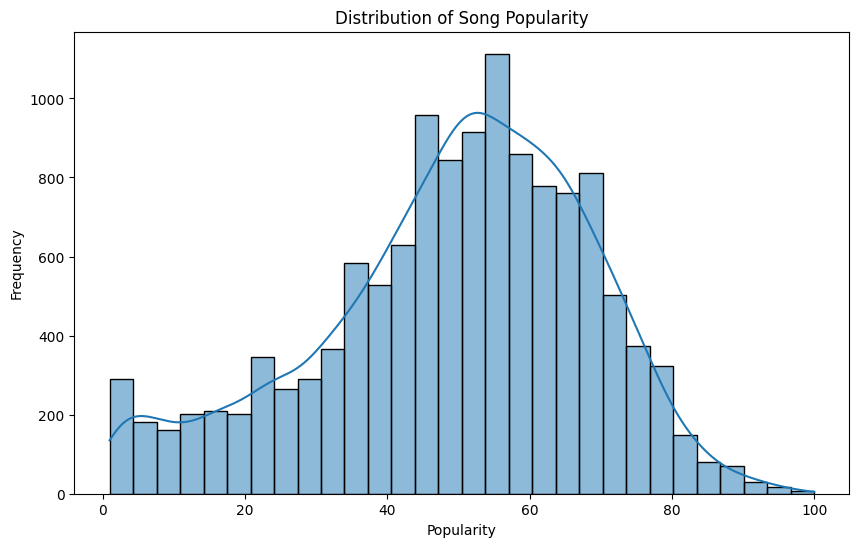

In [11]:
# Distribution of song popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['song_popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

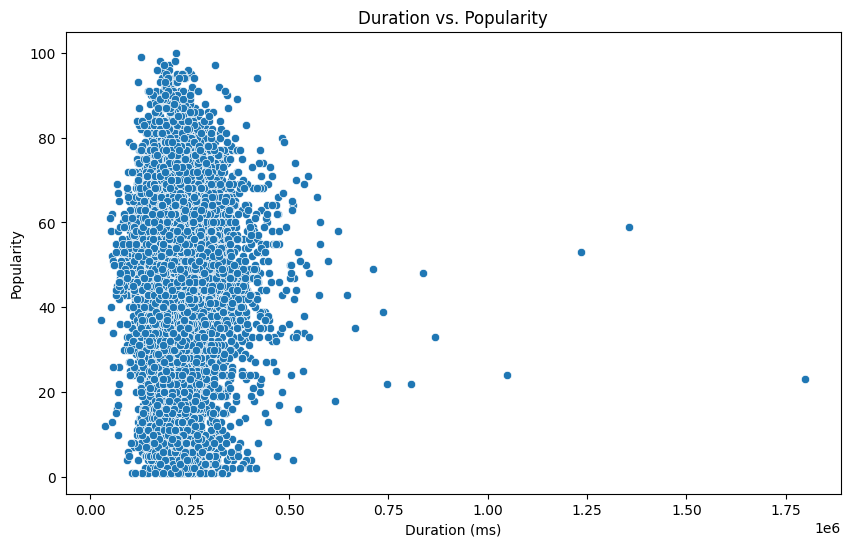

In [12]:
# Scatter plot of duration vs. popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='song_duration_ms', y='song_popularity', data=df)
plt.title('Duration vs. Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')

plt.show()

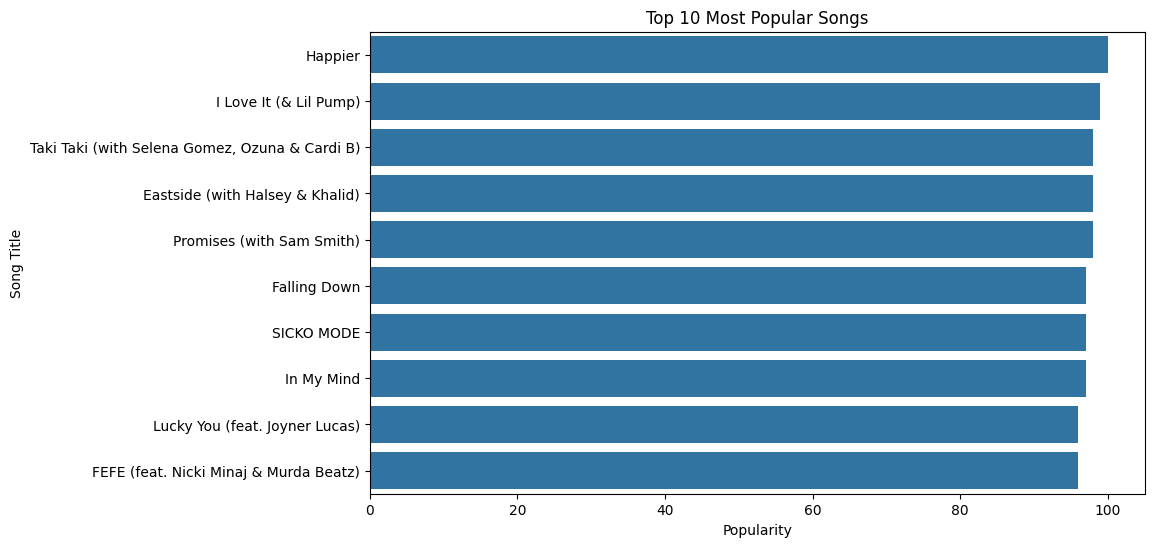

In [13]:
# Top 10 most popular songs
top_songs = df.nlargest(10, 'song_popularity')
plt.figure(figsize=(10, 6))
sns.barplot(x='song_popularity', y='song_name', data=top_songs)
plt.title('Top 10 Most Popular Songs')
plt.xlabel('Popularity')
plt.ylabel('Song Title')
plt.show()

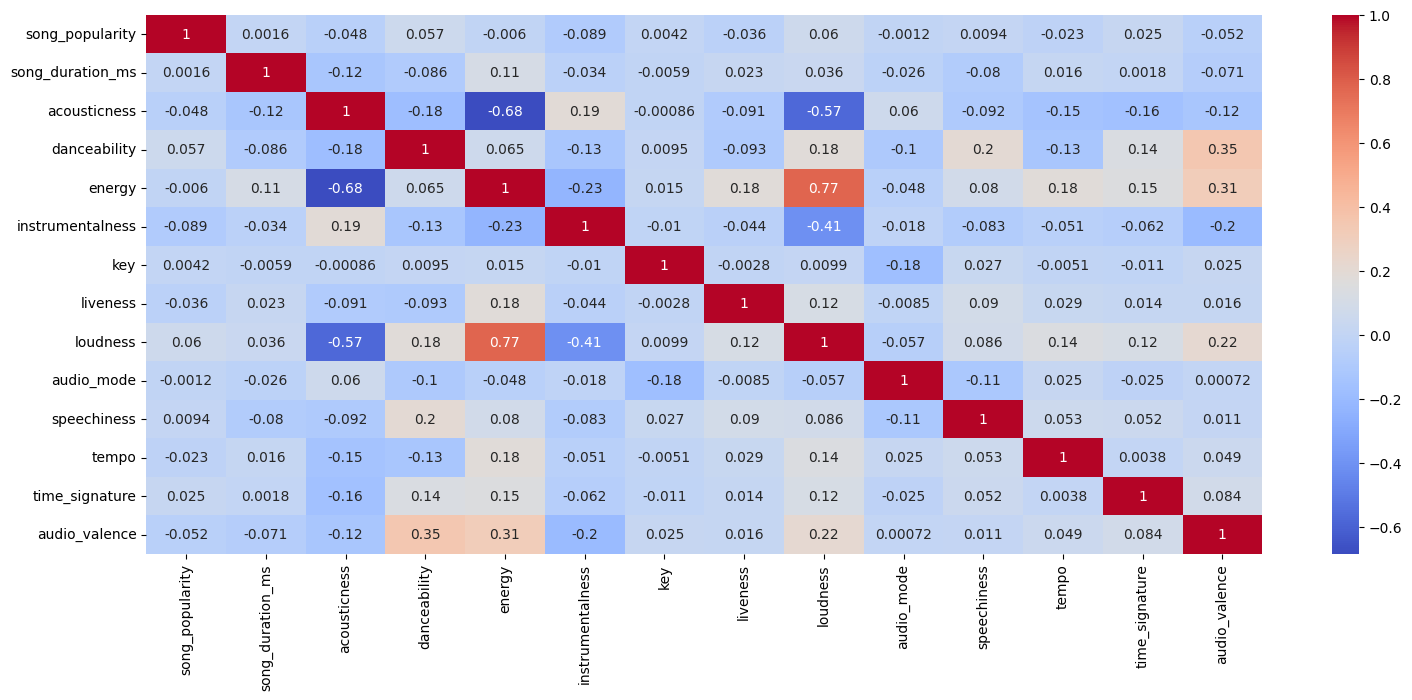

In [14]:
# Filter numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix if any numeric data exists
if not numeric_df.empty:
    cor = numeric_df.corr()

    # Create a heatmap
    f, ax = plt.subplots(figsize=(18, 7))
    sns.heatmap(cor, annot=True, cmap='coolwarm', ax=ax)
    plt.show()

In [15]:

# remove the features
df = df.drop(['song_name','audio_mode','key','speechiness','album_names','song_duration_ms','energy'],axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12853 entries, 0 to 18834
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   12853 non-null  int64  
 1   acousticness      12853 non-null  float64
 2   danceability      12853 non-null  float64
 3   instrumentalness  12853 non-null  float64
 4   liveness          12853 non-null  float64
 5   loudness          12853 non-null  float64
 6   tempo             12853 non-null  float64
 7   time_signature    12853 non-null  int64  
 8   audio_valence     12853 non-null  float64
 9   artist_name       12853 non-null  int32  
 10  playlist          12853 non-null  int32  
dtypes: float64(7), int32(2), int64(2)
memory usage: 1.1 MB


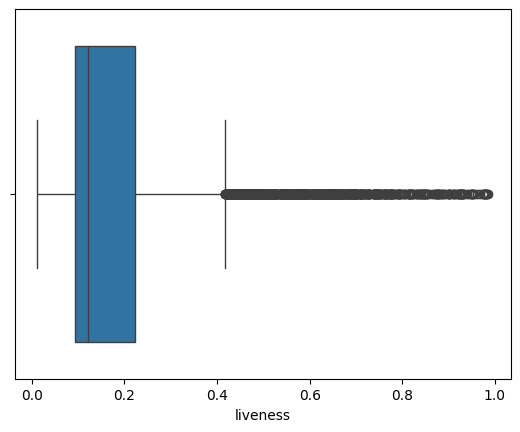

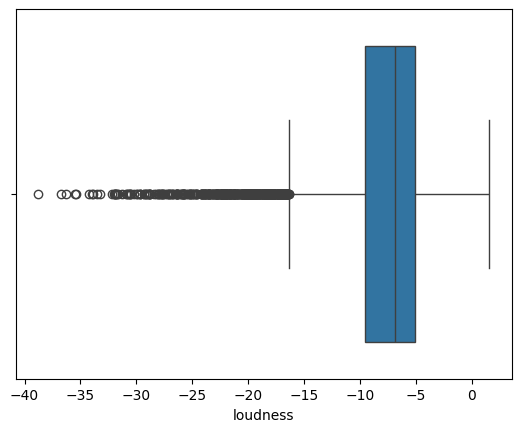

In [17]:
sns.boxplot(x=df['liveness'])
plt.show()
sns.boxplot(x=df['loudness'])
plt.show()

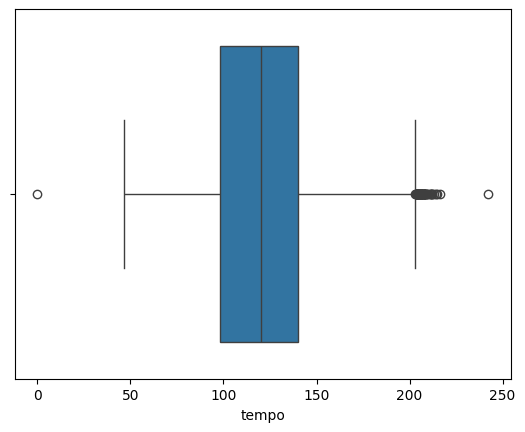

In [18]:
sns.boxplot(x=df['tempo'])
plt.show()

index_delete = df.index[df['tempo']==0]
df = df.drop(index_delete)

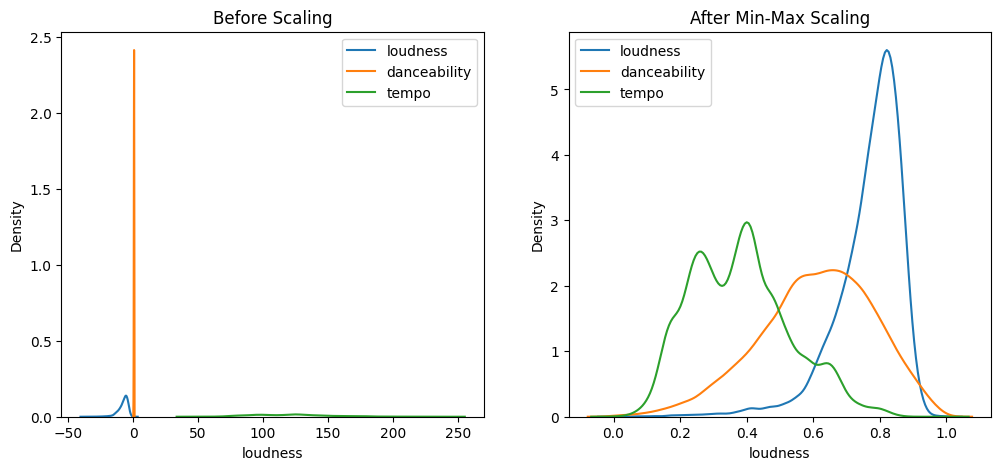

In [19]:
# separate the target

y=df['song_popularity']
x=df.drop(['song_popularity'],axis=1)

numeric_df = x.select_dtypes(include=['float64', 'int64','int32'])

# Initialize the MinMaxScaler
scaler = preprocessing.MinMaxScaler()

# Fit and transform the numeric data
x_scaled = scaler.fit_transform(numeric_df)

# Create a new DataFrame with scaled data
x = pd.DataFrame(x_scaled, columns=numeric_df.columns)



scaler2 = preprocessing.MinMaxScaler()
y_scaled = scaler2.fit_transform(y.values.reshape(-1, 1))
y = pd.DataFrame(y_scaled, columns=['song_popularity'])



# Visualizing before and after scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(df['loudness'], ax=ax1, label='loudness')
sns.kdeplot(df['danceability'], ax=ax1, label='danceability')
sns.kdeplot(df['tempo'], ax=ax1, label='tempo')
ax1.legend()

ax2.set_title('After Min-Max Scaling')
sns.kdeplot(x['loudness'], ax=ax2, label='loudness')
sns.kdeplot(x['danceability'], ax=ax2, label='danceability')
sns.kdeplot(x['tempo'], ax=ax2, label='tempo')
ax2.legend()

plt.show()

In [20]:
x.head()

,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,artist_name,playlist
0,0.005541,0.470677,0.000029,0.048250,0.859242,0.615495,0.8,0.469303,0.330945,0.0
1,0.010340,0.520267,0.000000,0.098655,0.801948,0.299729,0.8,0.361082,0.505127,0.0
2,0.008202,0.730487,0.448345,0.249564,0.766734,0.394887,0.8,0.313215,0.888889,0.0
3,0.026505,0.422165,0.003561,0.092496,0.838352,0.387545,0.8,0.182102,0.707543,0.0
4,0.000957,0.417853,0.000000,0.103788,0.835204,0.640790,0.8,0.573361,0.623121,0.0


In [21]:
y.head()

,song_popularity
0,0.727273
1,0.656566
2,0.757576
3,0.737374
4,0.555556


In [22]:
# Using Deep Learning Sequential Model for same

# Import mean_squared_error
from sklearn.metrics import mean_squared_error


# Train, validation, and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

# Create the model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))                               # Second hidden layer
model.add(Dense(1))                                                  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=32, callbacks=[early_stopping])

# Save the model
model.save('my_model.h5')


Epoch 1/100


C:\Users\alank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


257/257 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0633 - mean_absolute_error: 0.1967 - val_loss: 0.0340 - val_mean_absolute_error: 0.1463
Epoch 2/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.0363 - mean_absolute_error: 0.1505 - val_loss: 0.0338 - val_mean_absolute_error: 0.1440
Epoch 3/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.0379 - mean_absolute_error: 0.1546 - val_loss: 0.0335 - val_mean_absolute_error: 0.1453
Epoch 4/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 0.0362 - mean_absolute_error: 0.1508 - val_loss: 0.0335 - val_mean_absolute_error: 0.1454
Epoch 5/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.0356 - mean_absolute_error: 0.1486 - val_loss: 0.0334 - val_mean_absolute_error: 0.1438
Epoch 6/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 0.0347 - mean_absolute_error: 0.1469 - val_loss: 0.0332 - val_mean_absolute_error: 0.1436
Epoch 7/100
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - loss: 0.0358 - mean_absolute_error: 0.1

In [23]:
# Evaluate the model
test_predictions = model.predict(x_test)
rms_deepLearning = np.sqrt(mean_squared_error(y_test, test_predictions))
print(f'Root Mean Squared Error on test set: {rms_deepLearning}')


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step
Root Mean Squared Error on test set: 0.18432923514630917


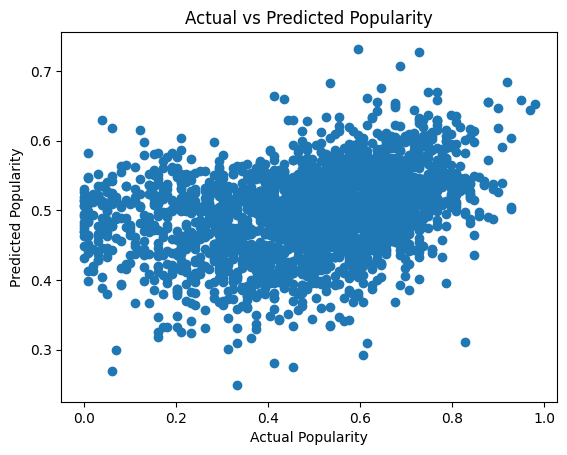

In [24]:
# Visualize predictions vs actual values on test set
plt.scatter(y_test, test_predictions)
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()

In [25]:
x.head()

,acousticness,danceability,instrumentalness,liveness,loudness,tempo,time_signature,audio_valence,artist_name,playlist
0,0.005541,0.470677,0.000029,0.048250,0.859242,0.615495,0.8,0.469303,0.330945,0.0
1,0.010340,0.520267,0.000000,0.098655,0.801948,0.299729,0.8,0.361082,0.505127,0.0
2,0.008202,0.730487,0.448345,0.249564,0.766734,0.394887,0.8,0.313215,0.888889,0.0
3,0.026505,0.422165,0.003561,0.092496,0.838352,0.387545,0.8,0.182102,0.707543,0.0
4,0.000957,0.417853,0.000000,0.103788,0.835204,0.640790,0.8,0.573361,0.623121,0.0


In [27]:
import gradio as gr
import numpy as np
import tensorflow as tf

# Load the pre-trained Keras model
model = tf.keras.models.load_model('my_model.h5')

# Function to make predictions
def predict(acousticness, danceability, instrumentalness, liveness, loudness, tempo, time_signature, audio_valence, artist_name, playlist):
    time_signature = int(time_signature)  # since it's likely an integer
    audio_valence = float(audio_valence)
    # Normalize artist and playlist name inputs
    if artist_name is None:
        return "Error: Please select an artist name."

    if playlist is None:
        return "Error: Please select a playlist."
    artist_name = artist_name.strip()
    playlist = playlist.strip()

    # Handle artist name encoding
    if artist_name in leble_en_artist.classes_:
        artist_encoded = leble_en_artist.transform([artist_name])[0]
    else:
        return f"Error: Artist name '{artist_name}' not recognized. Please provide a valid artist name."

    # Handle playlist encoding
    if playlist in leble_en_playlist.classes_:
        playlist_encoded = leble_en_playlist.transform([playlist])[0]
    else:
        return f"Error: Playlist name '{playlist}' not recognized. Please provide a valid playlist name."

    # Create an input array
    input_data = np.array([acousticness, danceability, instrumentalness, liveness, loudness, tempo, time_signature, audio_valence, artist_encoded, playlist_encoded])
    # Scale the inputs (make sure you have your scaler defined)

    input_data_scaled = scaler.transform(input_data.reshape(1, -1))  # Reshape to 2D

    # Make prediction
    prediction = model.predict(input_data_scaled)

    # Return the predicted song popularity
    return f'Predicted Song Popularity: {(100*prediction[0][0]):.2f} / 100'


#Styling and modern interface design
css = """  
    .gradio-container {  
        background-color: #ffffff; /* Light background for the main container */  
        font-family: 'Roboto', sans-serif;  
    }  
    .input-container {  
        padding: 20px;  
        background-color: #fafafa; /* Light background for input container */  
        border-radius: 10px;  
        box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); /* Light shadow for depth */  
    }  
    .footer {  
        margin-top: 20px;  
        text-align: center;  
        font-size: 12px;  
        color: #555; /* Footer text color */  
    }  
    .gr-button {  
        background-color: #007bff; /* Primary button color */  
        color: white; /* Button text color */  
        border: none; /* No border */  
        border-radius: 5px; /* Rounded borders */  
        padding: 10px 20px; /* Padding */  
    }  
    .gr-button:hover {  
        background-color: #0056b3; /* Button hover effect color */  
    }  

    /* Slider styling */  
    .slider {  
        background-color: #007bff; /* Track color of the slider */  
    }  
    .slider .gr-slider {  
        background-color: #e0e0e0; /* Track background color */  
    }  
    .slider input[type='range'] {  
        -webkit-appearance: none; /* Remove default styling */  
        background: #f0f0f0; /* Lighter track */  
        border-radius: 10px; /* Rounded edges */  
        height: 5px; /* Height of slider track */  
        outline: none !important; /* Removes outline focus */  
    }  
    .slider input[type='range']::-webkit-slider-thumb {  
        -webkit-appearance: none; /* Remove default styling */  
        width: 20px; /* Thumb width */  
        height: 20px; /* Thumb height */  
        border-radius: 50%; /* Rounded thumb */  
        background: #007bff; /* Thumb color */  
        cursor: pointer; /* Pointer hand on hover */  
    }  
    .slider input[type='range']::-moz-range-thumb {  
        width: 20px; /* Thumb width */  
        height: 20px; /* Thumb height */  
        border-radius: 50%; /* Rounded thumb */  
        background: #007bff; /* Thumb color */  
        cursor: pointer; /* Pointer hand on hover */  
    }  

    /* Dropdown styling */  
    .gr-dropdown {  
        background-color: #ffffff; /* Dropdown background */  
        border: 1px solid #dddddd; /* Light border for dropdown */  
        border-radius: 5px; /* Rounded dropdown */  
        color: #333; /* Text color */  
    }  
    .gr-dropdown:hover {  
        border-color: #007bff; /* Change border color on hover */  
    }  
"""

# Modern Gradio Interface
interface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Slider(minimum=0.0, maximum=1.0, label="Acousticness", step=0.01),
        gr.Slider(minimum=0.0, maximum=1.0, label="Danceability", step=0.01),
        gr.Slider(minimum=0.0, maximum=1.0, label="Instrumentalness", step=0.01),
        gr.Slider(minimum=0.0, maximum=1.0, label="Liveness", step=0.01),
        gr.Slider(minimum=-60.0, maximum=0.0, label="Loudness (dB)", step=0.1),
        gr.Slider(minimum=0.0, maximum=300.0, label="Tempo (BPM)", step=1),
        gr.Slider(minimum=0, maximum=4, label="Time Signature (0-4)", step=1),
        gr.Slider(minimum=0.0, maximum=1.0, label="Audio Valence", step=0.01),
        gr.Dropdown(choices=list(leble_en_artist.classes_), label="Artist Name", interactive=True),
        gr.Dropdown(choices=list(leble_en_playlist.classes_), label="Playlist", interactive=True),
    ],
    outputs="text",
    title="Song Popularity Predictor",
    description="Input the musical features to predict the popularity of a song. Use the sliders to adjust acoustic features and select an artist and playlist from the dropdowns.",
    theme="default",
    css=css
)

# Launch the Gradio interface
if __name__ == "__main__":
    interface.launch(share = True)


* Running on local URL:  http://127.0.0.1:7861
* Running on public URL: https://68baadafcb514dde46.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


C:\Users\alank\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Using existing dataset file at: .gradio\flagged\dataset1.csv
